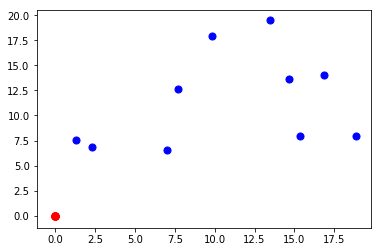

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import math,time
import random 
import numpy.random as rd
from decimal import Decimal, ROUND_DOWN
from IPython import display

"""variable"""
N = 10 #nuber of individuals
W_dis = 0.3 #wight of distance
W_soc = 0.7 #weight of social affiliation
a = 0.01 #probabilty to chage state sponteniously
itr = 10 #number of interation of simulation 
x1 = np.array(range(N))

"""initial condition"""
state = np.ones(shape=(N,1)) ##iniitial state
depart = random.randint(0,N-1)  ## First departure
state[depart,0] = 0
num_ind = np.array([])

"""function"""
def distance(X,Y):
    """function for calculate distance among individuals"""
    res = np.zeros(shape=(N,N))
    for i in range(N):
        r_dis = np.array([])
        xdis = X-X[i]
        ydis = Y-Y[i]
        r_dis = (xdis**2+ydis**2)**0.5
        res[i,0:N] = r_dis

    return res


def softmax(Z):
    """softmax fuction"""
    return np.exp(Z)/np.sum(np.exp(Z))

def pro(A,B,S):
    """compute probabtility to be next"""
    res_p = np.zeros(shape=(N,1))
    k = (W_dis*A+W_soc*B)*S

    for i in range(N):
        p = np.sum(k[i,:])
        res_p[i,0] = p

    prob = softmax(res_p+a)
    return prob

"""social affiliation"""
xsoc = np.random.uniform(0,20,N)
ysoc = np.random.uniform(0,20,N)

res_soc = np.zeros(shape=(N,N))

res_soc = distance(xsoc,ysoc)

"""distance"""
xpos = np.random.uniform(0,20,N)
ypos = np.random.uniform(0,20,N)

res_dist = np.zeros(shape=(N,N))

res_dist = distance(xpos,ypos)


"""show initial position"""
plt.scatter(xpos,ypos,c="red")
plt.scatter(xpos[depart],ypos[depart],c="blue")
plt.show()

"""simulation"""

for k in range(itr):
    time.sleep(2)
    print(np.reshape(state,(1,N)))
    
    res_p = np.zeros(shape=(1,N))
    prob = pro(res_dist,res_soc,state)  #calculate probaility to change state

    prob = np.reshape(prob,(1,N))
    prob = prob[0,:]
    x2 = rd.choice(N, 1, p=prob) #select next one from the probalitiy 
    state[x2,0] = 0 #change state
   
          
    xT = np.reshape(xpos,(N,1))  
    yT = np.reshape(ypos,(N,1))
    
    xnew = xT*state #following state, indivi
    ynew = yT*state
    
    #show plot of each individual's state 
    plt.clf()
    plt.scatter(xpos,ypos,c="blue", s=50) #blue is departed individuals
    plt.scatter(xnew,ynew,c="red", s=50) #red is undeparted individuals 
    display.display(plt.gcf())
    display.clear_output(wait=True)
    
    sum_ind_state = N - np.sum(state)
    num_ind = np.append(num_ind,sum_ind_state) 



[ 2.  3.  4.  5.  6.  7.  8.  9. 10. 10.]


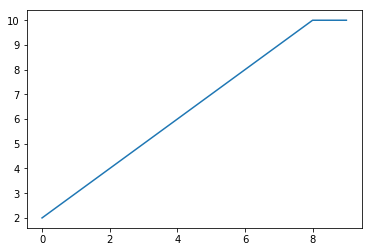

In [3]:
print(num_ind)
plt.plot(range(itr),num_ind)
plt.show()